TASK-2 DATA VISUALIZATION

In [48]:
#importing the reqiured libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#Reading the datasets
df = pd.read_csv("iot_dataset.csv")
df_mapping = pd.read_csv("iot_dataset_mapping.csv")

print("Count of Dataset:", df.shape)
print("Count of Mapping dataset:", df_mapping.shape)
df.head()

Count of Dataset: (10000, 18)
Count of Mapping dataset: (12, 2)


,node_id,type,name,latitude,longitude,created_at,value 1,value 2,value 3,value 4,value 5,value 6,value 7,value 8,value 9,value 10,value 11,value 12
0,sl051,AQ,Node sl051,13.017933,77.555378,2025-09-21 03:52:44.102089,12.231861,41.860344,NaN,174.722133,NaN,26.590544,31.772929,26.368710,3.490259,6.937300,24.732230,31.339453
1,wf030,SL,Node wf030,12.985701,77.659210,2025-09-12 04:14:45.102089,15.729319,69.414902,-0.991364,106.240761,NaN,78.301568,24.112349,28.095163,41.047575,41.616871,34.944792,NaN
2,aq036,WF,Node aq036,12.968674,77.646228,2025-10-13 04:05:20.102089,0.167878,0.310233,1.870961,74.553437,1.532171,0.682208,NaN,NaN,NaN,NaN,NaN,NaN
3,wf048,WF,Node wf048,13.020752,77.560964,2025-10-06 06:09:41.102089,0.544607,0.057603,1.973522,43.623925,0.109130,0.019358,NaN,NaN,NaN,NaN,NaN,NaN
4,aq037,AQ,Node aq037,12.951537,77.604078,2025-08-28 07:50:57.102089,4.737986,5.820494,6.553738,180.158180,15.087324,31.855556,5.234277,42.704157,16.621897,2.290797,8.087435,3.384203


In [50]:
#Information about the missing values and unique columns
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
print("\nUnique Vertical types:\n", df['type'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   node_id     10000 non-null  object 
 1   type        10000 non-null  object 
 2   name        10000 non-null  object 
 3   latitude    10000 non-null  float64
 4   longitude   10000 non-null  float64
 5   created_at  10000 non-null  object 
 6   value 1     9601 non-null   float64
 7   value 2     9501 non-null   float64
 8   value 3     9402 non-null   float64
 9   value 4     9302 non-null   float64
 10  value 5     9701 non-null   float64
 11  value 6     9601 non-null   float64
 12  value 7     6646 non-null   float64
 13  value 8     6577 non-null   float64
 14  value 9     6507 non-null   float64
 15  value 10    6786 non-null   float64
 16  value 11    6716 non-null   float64
 17  value 12    4353 non-null   float64
dtypes: float64(14), object(4)
memory usage: 1.4+ MB

Missing values per

In [51]:
#cleaning the data 
#converting the timestamps, fixing white spaces and standardize types
df['created_at'] = pd.to_datetime(df['created_at'])
df['type'] = df['type'].str.strip().str.upper()

#removing the duplicates
df.drop_duplicates(inplace=True)
print("cleaned timestamp, vertical names and removed duplicates")
df.head()

cleaned timestamp, vertical names and removed duplicates


,node_id,type,name,latitude,longitude,created_at,value 1,value 2,value 3,value 4,value 5,value 6,value 7,value 8,value 9,value 10,value 11,value 12
0,sl051,AQ,Node sl051,13.017933,77.555378,2025-09-21 03:52:44.102089,12.231861,41.860344,NaN,174.722133,NaN,26.590544,31.772929,26.368710,3.490259,6.937300,24.732230,31.339453
1,wf030,SL,Node wf030,12.985701,77.659210,2025-09-12 04:14:45.102089,15.729319,69.414902,-0.991364,106.240761,NaN,78.301568,24.112349,28.095163,41.047575,41.616871,34.944792,NaN
2,aq036,WF,Node aq036,12.968674,77.646228,2025-10-13 04:05:20.102089,0.167878,0.310233,1.870961,74.553437,1.532171,0.682208,NaN,NaN,NaN,NaN,NaN,NaN
3,wf048,WF,Node wf048,13.020752,77.560964,2025-10-06 06:09:41.102089,0.544607,0.057603,1.973522,43.623925,0.109130,0.019358,NaN,NaN,NaN,NaN,NaN,NaN
4,aq037,AQ,Node aq037,12.951537,77.604078,2025-08-28 07:50:57.102089,4.737986,5.820494,6.553738,180.158180,15.087324,31.855556,5.234277,42.704157,16.621897,2.290797,8.087435,3.384203


In [52]:
#Handling the missing values 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("Handled Missing values with median values!!")

Handled Missing values with median values!!


In [53]:
#Load mapping data
def parse_mapping(text):
    try:
        return json.loads(text.replace("'", '"'))
    except:
        return{}
    
df_mapping['mapping_dict'] = df_mapping['original_column'].apply(parse_mapping)
df_mapping.head()

,value_col,original_column,mapping_dict
0,value 1,"{'AQ': 'pm25', 'WF': 'flowrate', 'SL': 'active...","{'AQ': 'pm25', 'WF': 'flowrate', 'SL': 'active..."
1,value 2,"{'AQ': 'calibrated_pm25', 'WF': 'total_flow', ...","{'AQ': 'calibrated_pm25', 'WF': 'total_flow', ..."
2,value 3,"{'AQ': 'pm10', 'WF': 'pressure', 'SL': 'freque...","{'AQ': 'pm10', 'WF': 'pressure', 'SL': 'freque..."
3,value 4,"{'AQ': 'calibrated_pm10', 'WF': 'pressure_volt...","{'AQ': 'calibrated_pm10', 'WF': 'pressure_volt..."
4,value 5,"{'AQ': 'temperature', 'WF': 'flow_volume', 'SL...","{'AQ': 'temperature', 'WF': 'flow_volume', 'SL..."


In [54]:
#Renaming columns based on each vertical
verticals = df['type'].unique()
renamed_dfs = {}

for v in verticals:
    temp = df[df['type'] == v].copy()
    for _, row in df_mapping.iterrows():
        val_col = row['value_col']
        mapping = row['mapping_dict']
        if v in mapping:
            temp.rename(columns={val_col: mapping[v]}, inplace=True)
    renamed_dfs[v] = temp
    print(f"{v} renamed → {temp.shape[0]} rows")

AQ renamed → 4582 rows
SL renamed → 2413 rows
WF renamed → 3005 rows


In [55]:
#saving the cleaned data into os
import os
os.makedirs("Datasets/cleaned", exist_ok=True)


--- AQ Visualization ---


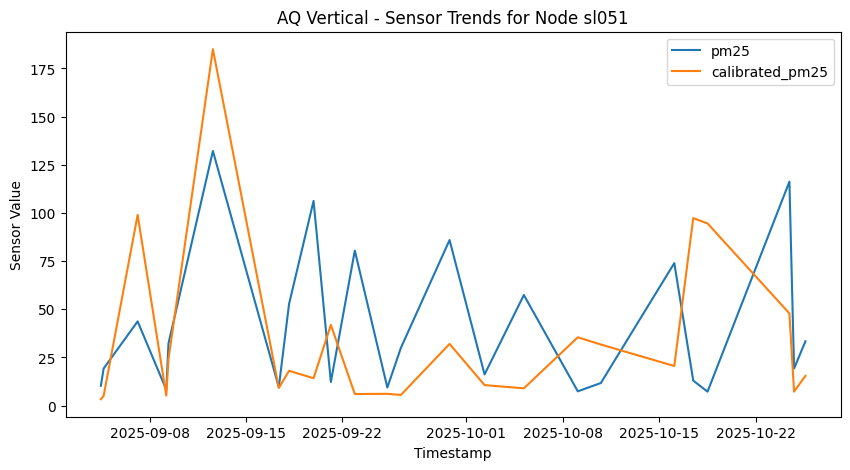

--- SL Visualization ---


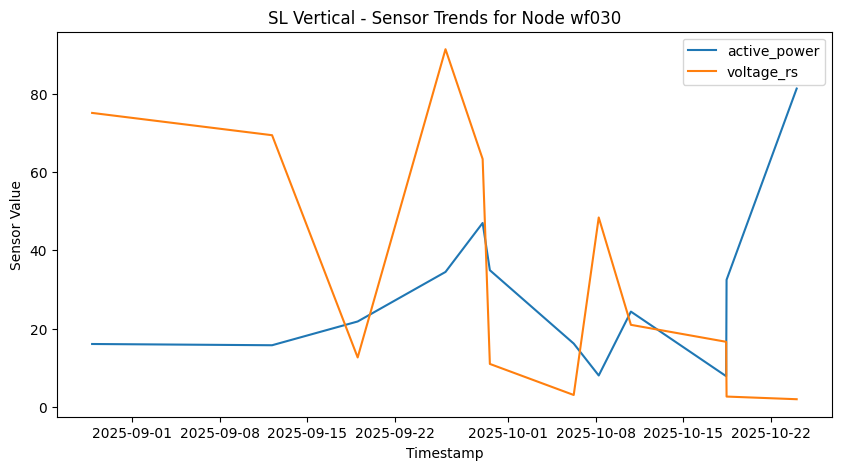

--- WF Visualization ---


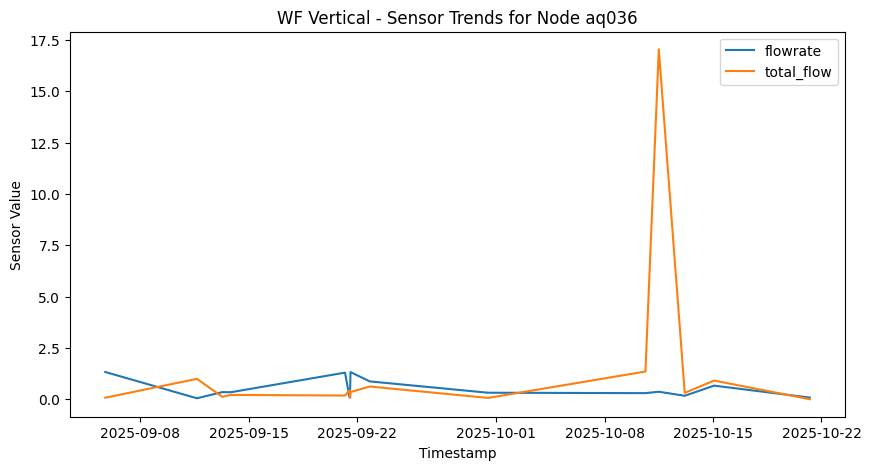

In [56]:
# exploring each vertical through visualizations

for v, d in renamed_dfs.items():
    print(f"--- {v} Visualization ---")
    
    # picked one node_id to visualize
    sample_node = d['node_id'].iloc[0] if 'node_id' in d.columns else None
    if sample_node:
        node_df = d[d['node_id'] == sample_node].sort_values('created_at')
    else:
        node_df = d.sort_values('created_at')

    # choosed first 2 numeric sensor columns 
    num_cols = [col for col in node_df.select_dtypes(include='number').columns if col not in ['latitude', 'longitude']][:2]

    plt.figure(figsize=(10,5))
    for col in num_cols:
        plt.plot(node_df['created_at'], node_df[col], label=col)
    
    plt.title(f"{v} Vertical - Sensor Trends for Node {sample_node}")
    plt.xlabel("Timestamp")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.show()




In [57]:
#Summary of statistics
for v, d in renamed_dfs.items():
    print(f"--- {v} Summary ---")
    display(d.describe())


--- AQ Summary ---


,latitude,longitude,created_at,pm25,calibrated_pm25,pm10,calibrated_pm10,temperature,calibrated_temperature,relative_humidity,calibrated_relative_humidity,noise,calibrated_noise,aqi,aql
count,4582.000000,4582.000000,4582,4582.000000,4.582000e+03,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000
mean,12.983316,77.599843,2025-09-25 23:03:18.518937344,928.856427,1.153416e+03,136.959977,100.034673,62.202223,79.199276,47.528452,40.519285,19.306594,25.323050,148.616813,101.696576
min,7.959273,77.513630,2025-08-26 18:49:12.102089,0.359626,6.603253e-01,0.392016,0.295211,6.578164,6.056496,0.407618,0.220481,0.454049,0.364259,0.519761,0.206452
25%,12.956705,77.556940,2025-09-10 14:46:04.852088832,12.585400,1.339197e+01,10.041127,13.445701,21.395697,21.812338,16.993284,16.969467,4.595959,4.513246,12.629419,12.520401
50%,12.980130,77.599649,2025-09-25 21:32:44.602088960,25.753407,2.686596e+01,25.544548,31.345076,24.899079,24.780664,27.782492,27.849849,7.969977,8.021188,29.278334,27.125638
75%,13.013212,77.643409,2025-10-11 08:03:24.852088832,58.616808,6.314071e+01,59.954620,60.395633,28.481692,28.386141,38.215598,37.970422,12.392642,12.905976,61.936369,58.543127
max,18.006682,77.681870,2025-10-25 17:53:25.102089,550778.223628,1.096511e+06,31978.763399,22403.409363,4597.870954,4960.608610,11532.174874,4604.171519,5577.173839,7553.025356,32156.875585,34979.798622
std,0.211325,0.041974,NaN,17402.544997,2.369245e+04,1176.263238,626.367012,319.756320,435.343422,340.413469,185.324255,135.823118,195.162924,1176.705357,761.539761


--- SL Summary ---


,latitude,longitude,created_at,active_power,voltage_rs,frequency,power_factor,pf_avg,pv1_power,pv2_power,pv3_power,r_active_power,y_active_power,b_active_power,
count,2413.000000,2413.000000,2413,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2.413000e+03
mean,12.988520,77.599886,2025-09-25 19:13:19.759776256,759.630645,870.965869,0.027746,89.241815,11.271430,170.819523,92.289698,66.344859,103.118317,115.215347,178.473397,2.712564e+01
min,12.914073,77.514926,2025-08-26 19:57:03.102089,0.000782,0.013664,-406.230709,0.067690,0.136867,0.038081,0.029745,0.054708,0.022161,0.014369,0.036592,2.712564e+01
25%,12.957710,77.556204,2025-09-10 19:36:21.102088960,16.156254,17.042925,-0.629956,18.058615,1.347166,18.001745,16.226537,17.997305,12.496207,14.342477,17.592751,2.712564e+01
50%,12.980984,77.600246,2025-09-24 20:05:31.102088960,32.517891,32.796233,0.078495,31.868728,2.714318,34.316457,31.847936,31.841668,30.691334,32.625280,32.064588,2.712564e+01
75%,13.014043,77.643225,2025-10-11 06:51:35.102088960,58.733587,60.064399,0.884309,57.265302,5.441594,59.546631,57.636758,55.278529,56.505852,57.394963,58.041170,2.712564e+01
max,17.997084,77.685180,2025-10-25 17:58:23.102089,528382.418493,513222.349380,377.882170,9517.558046,2186.836524,31865.993529,19378.598575,6210.789528,43724.980171,16674.627334,98125.212518,2.712564e+01
std,0.146554,0.042571,NaN,16234.511615,16120.602457,18.505038,457.162706,78.592117,1254.780175,755.794025,305.497904,1097.514828,809.561673,2307.841209,7.106900e-15


--- WF Summary ---


,latitude,longitude,created_at,flowrate,total_flow,pressure,pressure_voltage,flow_volume,flow_time,,,,,,
count,3005.000000,3005.000000,3005,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3.005000e+03,3.005000e+03,3005.00000,3.005000e+03,3005.000000,3.005000e+03
mean,12.980856,77.602042,2025-09-26 07:24:02.967313664,9.058764,10.279871,5.721041,97.820127,4.867608,13.334197,2.810837e+01,2.833176e+01,10.94116,1.103487e+01,30.052036,2.712564e+01
min,7.935316,77.516798,2025-08-26 18:30:00.102089,0.000171,0.000007,0.033837,0.006540,0.000131,0.000064,2.810837e+01,2.833176e+01,10.94116,1.103487e+01,30.052036,2.712564e+01
25%,12.954691,77.560295,2025-09-11 11:56:32.102088960,0.161236,0.168127,1.703886,17.476090,0.151656,0.162306,2.810837e+01,2.833176e+01,10.94116,1.103487e+01,30.052036,2.712564e+01
50%,12.977620,77.601284,2025-09-26 08:18:39.102088960,0.379662,0.403098,2.037661,31.603666,0.398410,0.402595,2.810837e+01,2.833176e+01,10.94116,1.103487e+01,30.052036,2.712564e+01
75%,13.010098,77.644215,2025-10-11 19:03:54.102088960,0.828132,0.876937,2.431011,55.102399,0.873235,0.873564,2.810837e+01,2.833176e+01,10.94116,1.103487e+01,30.052036,2.712564e+01
max,17.991082,77.678303,2025-10-25 18:16:49.102089,6532.266733,8083.127416,699.954750,21210.008930,940.035230,18549.319149,2.810837e+01,2.833176e+01,10.94116,1.103487e+01,30.052036,2.712564e+01
std,0.289882,0.041206,NaN,137.234756,172.174958,37.966840,653.595043,30.900496,362.026182,3.553305e-15,3.553305e-15,0.00000,1.776652e-15,0.000000,7.106610e-15
